In [1]:
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.layout import planar_layout
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Graph Algorithms

## Search

In [2]:
g = {
    1: [2,3,4],
    2: [5,6],
    3: [],
    4: [7,8],
    5: [9,10],
    6: [],
    7: [11, 12],
    8: [],
    9: [],
    10: [],
    11: [],
    12: []
}

In [3]:
G = nx.from_dict_of_lists(g)

In [4]:
pos = graphviz_layout(G, prog='dot')

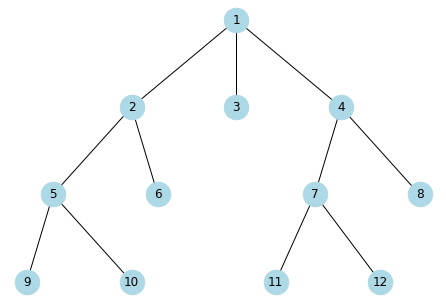

In [5]:
nx.draw(G, pos, with_labels=True, node_size=600, node_color='lightblue')

### Depth first search

In [6]:
list(nx.dfs_tree(G, 1))

[1, 2, 5, 9, 10, 6, 3, 4, 7, 11, 12, 8]

### Breadth first search

In [7]:
list(nx.bfs_tree(G, 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Pathfinding

In [8]:
edges = [
    ('A', 'B', 8),
    ('A', 'C', 5),
    ('A', 'D', 1),
    ('B', 'C', 6),
    ('C', 'D', 3),
    ('C', 'E', 2),
    ('D', 'E', 4)
]

In [9]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

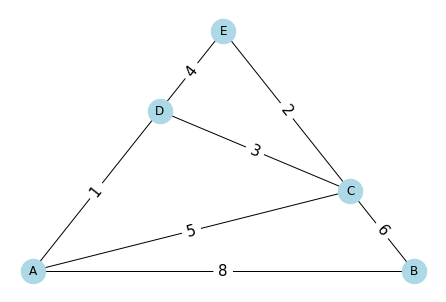

In [10]:
pos = planar_layout(G)
nx.draw(G, 
        pos, 
        with_labels=True,
        node_size=600, 
        node_color='lightblue')
labels = nx.draw_networkx_edge_labels(
    G, 
    pos, 
    edge_labels={(x[0], x[1]): str(x[2]) for x in edges},
    font_size=15,
)

### Shortest  path

In [11]:
nx.dijkstra_path(G, 'A', 'C')

['A', 'D', 'C']

### Single source shortest path

In [12]:
list(nx.single_source_dijkstra(G, 'A'))

[{'A': 0, 'D': 1, 'C': 4, 'E': 5, 'B': 8},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'D', 'C'],
  'D': ['A', 'D'],
  'E': ['A', 'D', 'E']}]

### All pairs shortest path

In [13]:
list(nx.all_pairs_dijkstra_path(G))

[('A',
  {'A': ['A'],
   'B': ['A', 'B'],
   'C': ['A', 'D', 'C'],
   'D': ['A', 'D'],
   'E': ['A', 'D', 'E']}),
 ('B',
  {'B': ['B'],
   'A': ['B', 'A'],
   'C': ['B', 'C'],
   'D': ['B', 'C', 'D'],
   'E': ['B', 'C', 'E']}),
 ('C',
  {'C': ['C'],
   'A': ['C', 'D', 'A'],
   'B': ['C', 'B'],
   'D': ['C', 'D'],
   'E': ['C', 'E']}),
 ('D',
  {'D': ['D'],
   'A': ['D', 'A'],
   'C': ['D', 'C'],
   'E': ['D', 'E'],
   'B': ['D', 'A', 'B']}),
 ('E',
  {'E': ['E'],
   'C': ['E', 'C'],
   'D': ['E', 'D'],
   'A': ['E', 'D', 'A'],
   'B': ['E', 'C', 'B']})]

### Minimal spanning tree

In [14]:
G_min = nx.minimum_spanning_tree(G)

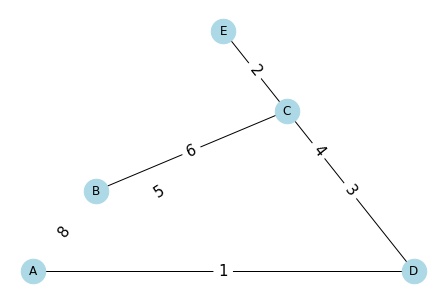

In [15]:
pos = planar_layout(G_min)
nx.draw(G_min, 
        pos, 
        with_labels=True,
        node_size=600, 
        node_color='lightblue')
labels = nx.draw_networkx_edge_labels(
    G_min, 
    pos, 
    edge_labels={(x[0], x[1]): str(x[2]) for x in edges},
    font_size=15,
)

### Centrality

In [16]:
G = nx.karate_club_graph()

In [17]:
pos = nx.kamada_kawai_layout(G)

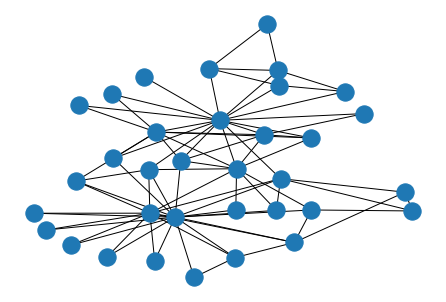

In [18]:
nx.draw(G, pos)

In [19]:
plt.viridis()

<Figure size 432x288 with 0 Axes>

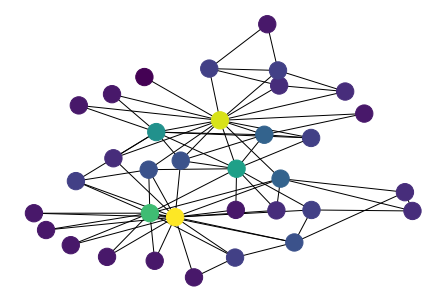

In [20]:
values = nx.degree(G)
n_color = np.asarray([values(n) for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

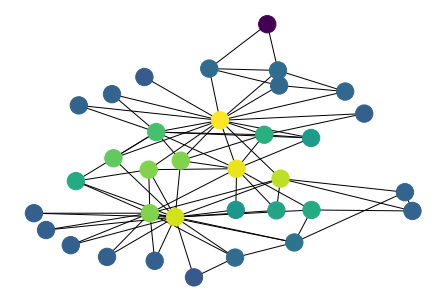

In [21]:
values = nx.closeness_centrality(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

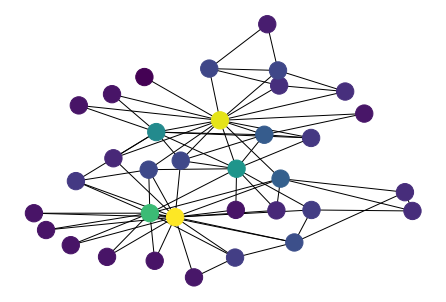

In [22]:
values = nx.pagerank(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

## Community Detection

### Triangles

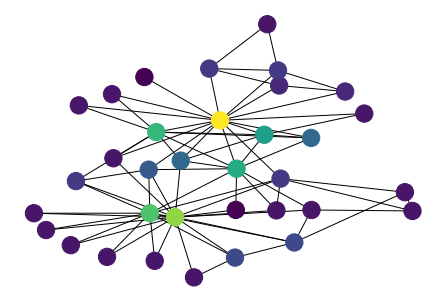

In [23]:
values = nx.triangles(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

### Clustering coefficient

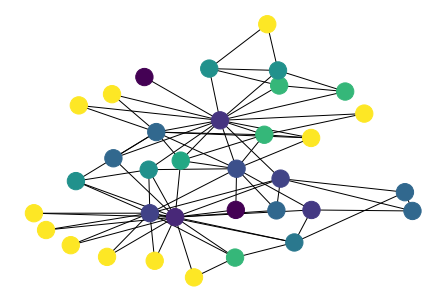

In [24]:
values = nx.clustering(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

In [25]:
import matplotlib.colors as mcolors

In [26]:
colors = list(mcolors.BASE_COLORS.keys())

### Label propagation

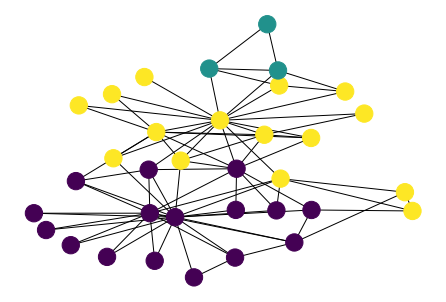

In [27]:
parts = list(nx.community.label_propagation_communities(G))
values = {n: i for i, ns in enumerate(parts) for n in ns}
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

### Clauset-Newman-Moore greedy modularity

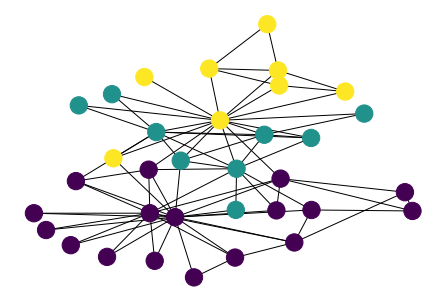

In [28]:
parts = list(nx.community.greedy_modularity_communities(G))
values = {n: i for i, ns in enumerate(parts) for n in ns}
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)